In [88]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [89]:
df =pd.read_csv("D:\\client\\project 8\\all_upwork_jobs.csv")
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [91]:
df.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [92]:
# Convert date format to 'YYYYMMDD'
df['published_date'] = pd.to_datetime(df['published_date']).dt.strftime('%Y%m%d%H%M%S')
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,20240217090954,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,20240217090917,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,20240217090846,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,20240217090808,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,20240217090742,False,NaN,NaN,650.0,India


In [93]:
# replacing na values 
df ["title"].fillna( method ='ffill', limit = 1, inplace = True)
df.isnull().sum()

title                  0
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [94]:
# replacing na values in title with No link
df["link"].fillna("No link", inplace = True)
df.isnull().sum()

title                  0
link                   0
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

### Fill the null values for numerical columns

In [95]:
# Select numerical columnsnumerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# to fill missing values with mean or median
def fill_missing_values(data, columns, strategy='mean'):
    if strategy == 'mean':
        for col in columns:
            df[col].fillna(data[col].mean(), inplace=True)
    elif strategy == 'median':
        for col in columns:
            df[col].fillna(data[col].median(), inplace=True)

            # Filling missing values with median
fill_missing_values(df, numerical_cols, strategy='median')

# Check there are no more missing values in the numerical columns
missing_values = df[numerical_cols].isnull().sum()
print(missing_values)

hourly_low     0
hourly_high    0
budget         0
dtype: int64


### Fill the null values for categorical columns

In [96]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with mode for each categorical column
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Calculate the mode for the column
    df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Verify that there are no more missing values in the categorical columns
df.isnull().sum()

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
# Renaming columns

df = df.rename(columns={
    'published_date': 'publisheddate',
    'is_hourly': 'ishourly',
    'hourly_low': 'hourlylow',
    'hourly_high': 'hourlyhigh'  
    })

df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,20240217090954,False,15.0,30.0,500.0,United States
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,20240217090917,False,15.0,30.0,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,20240217090846,True,10.0,30.0,100.0,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,20240217090808,True,15.0,30.0,100.0,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,20240217090742,False,15.0,30.0,650.0,India


#### Creating boxplot to find the outliers

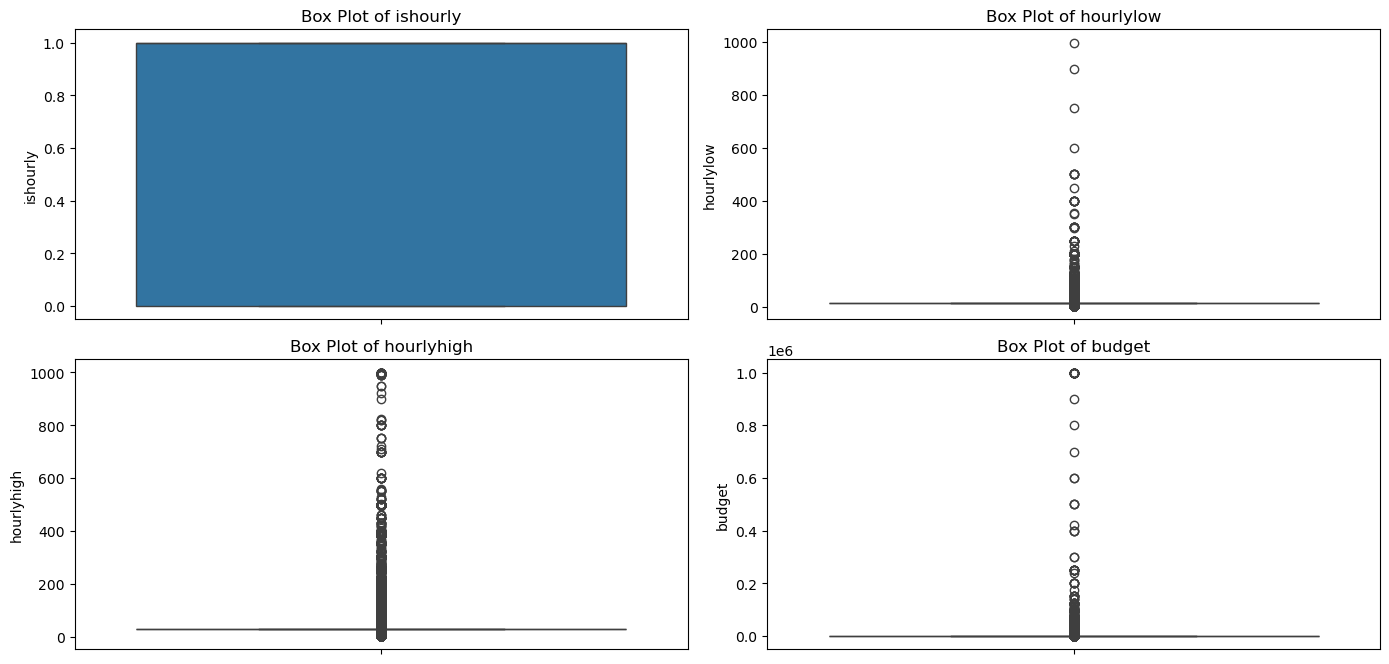

In [99]:
# List of numerical features to plot
features_Processor = [ 'ishourly', 'hourlylow', 'hourlyhigh', 'budget']

plt.figure(figsize=(14, 10))
for i, features_Processor in enumerate(features_Processor):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df[features_Processor])
    plt.title(f'Box Plot of {features_Processor}')
plt.tight_layout()
plt.show()

### Use IQR technique to find and rempove outliers

In [100]:
def iqr_technique(DFcol):
    Q1 = np.percentile(DFcol, 25)
    Q3 = np.percentile(DFcol, 75)

    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [101]:
df.ishourly.unique()

array([False,  True])

In [102]:
df.shape

(244828, 8)

In [103]:
#lower_range, upper_range = iqr_technique(df['hourlylow'])
#df = df [(df.hourlylow > lower_range) & (df.hourlylow < upper_range) ]

#df.shape

In [104]:
df.dropna(subset=['hourlylow', 'hourlyhigh', 'title'], inplace=True)

### average hourly rate

In [105]:

df['average_hourly'] = (df['hourlylow'] + df['hourlyhigh']) / 2

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

### Extract keywords from job titles

In [107]:

vectorizer = CountVectorizer(stop_words='english', max_features=20)
keywords_matrix = vectorizer.fit_transform(df['title'])
keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())

### Combine keywords with salary data

In [109]:

analysis_df = pd.concat([df[['average_hourly']], keywords_df], axis=1)
analysis_df.head()

,average_hourly,amp,app,create,data,design,designer,developer,editor,expert,...,manager,marketing,media,need,needed,social,specialist,video,website,youtube
0,22.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,22.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,22.5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Correlation analysis
correlations = analysis_df.corr()['average_hourly'].sort_values(ascending=False)
print("Top correlated keywords with salary:")
print(correlations.head(10))

Top correlated keywords with salary:
average_hourly    1.000000
expert            0.024366
needed            0.010119
developer         0.006093
marketing         0.000791
need             -0.001382
design           -0.004169
looking          -0.005276
amp              -0.006184
designer         -0.006323
Name: average_hourly, dtype: float64


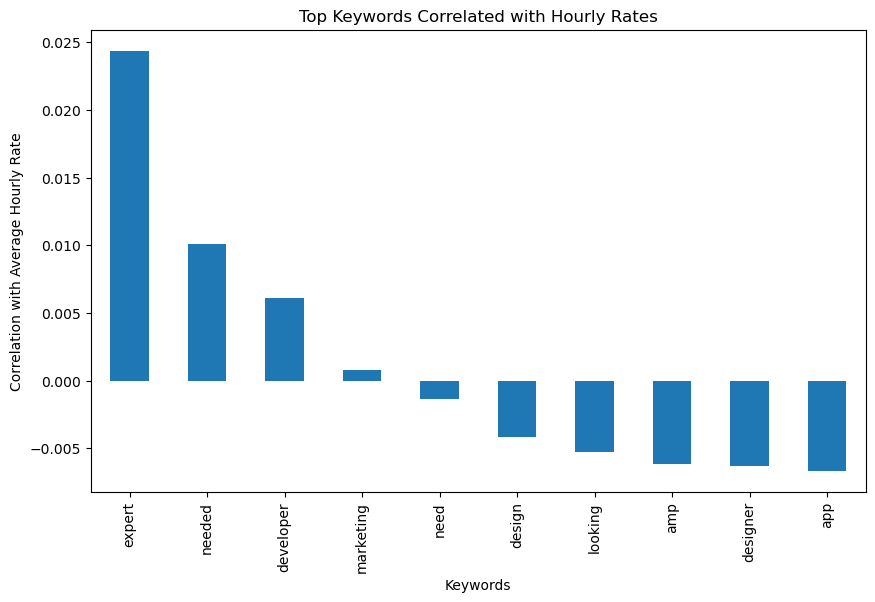

In [111]:
# Visualization
correlations[1:11].plot(kind='bar', figsize=(10, 6), title='Top Keywords Correlated with Hourly Rates')
plt.xlabel('Keywords')
plt.ylabel('Correlation with Average Hourly Rate')
plt.show()